## Importing necessary modules

In [1]:
import pandas as pd 
from pandas.plotting import scatter_matrix
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report,accuracy_score,f1_score,confusion_matrix

In [2]:
df = pd.read_csv("iris_data.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

## Data Exploration 

* Checking for NULL values

In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

* Exploring data types

In [5]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

* Types of Species

In [6]:
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.drop(['Id'],axis=1,inplace=True)

* Plotting Histograms

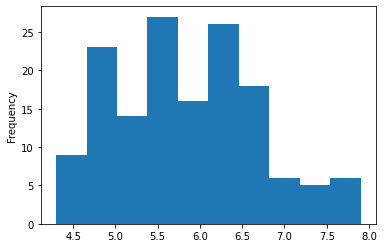

In [9]:
# SepalLengthCm
df['SepalLengthCm'].plot.hist()

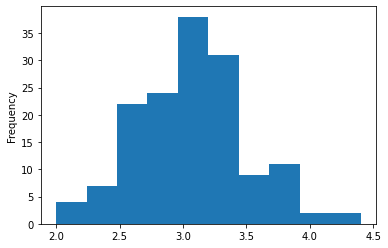

In [10]:
# SepalWidthCm
df['SepalWidthCm'].plot.hist()

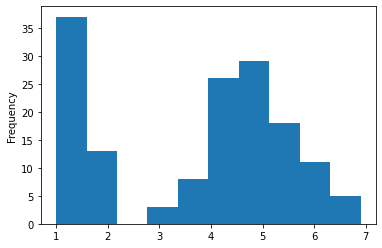

In [11]:
# PetalLengthCm
df['PetalLengthCm'].plot.hist()

This is not a uniform distribution 

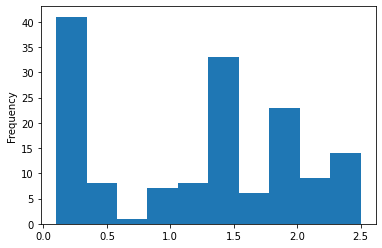

In [12]:
# PetalWidthCm
df['PetalWidthCm'].plot.hist()

This also not a uniform distribution

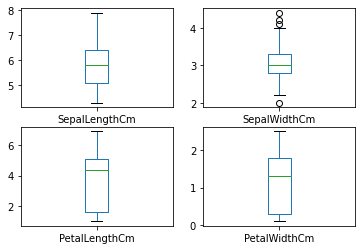

In [13]:
df.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)
plt.show()

[]

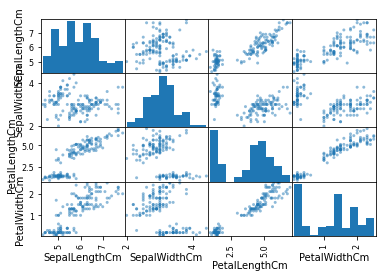

In [14]:
scatter_matrix(df)
plt.plot()

## Pre-processing data

In [15]:
x = df.drop(['Species'],axis=1)
y = df['Species']

In [16]:
col = x.columns
ss = StandardScaler()
x_scaled = ss.fit_transform(x)
x = pd.DataFrame(x_scaled,columns=col)

In [17]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [18]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

## Splitting Data and fitting Model

In [19]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,stratify = y)

In [20]:
train_x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
103,0.553333,-0.356361,1.047087,0.790591
116,0.795669,-0.124958,0.990221,0.790591
120,1.280340,0.337848,1.103953,1.447956
107,1.765012,-0.356361,1.445147,0.790591
11,-1.264185,0.800654,-1.227541,-1.312977


In [21]:
train_y.head()

103    Iris-virginica
116    Iris-virginica
120    Iris-virginica
107    Iris-virginica
11        Iris-setosa
Name: Species, dtype: object

We apply Stratified Sampling so that target variable is distributed equally.

## Fitting Models

### KNN-Classifier

In [22]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [23]:
train_pred = knn.predict(train_x)
test_pred = knn.predict(test_x)

In [24]:
train_f1 = f1_score(train_pred,train_y,average='weighted')
test_f1 = f1_score(test_pred,test_y,average='weighted')

train_acc = accuracy_score(train_pred,train_y)
test_acc = accuracy_score(test_pred,test_y)

print("Training F1 Score : ",train_f1)
print("Testing F1 Score : ",test_f1)
print("*****************************************")
print("Training Accuracy : ",train_acc)
print("Testing Accuracy : ",test_acc)

Training F1 Score :  0.975003906860447
Testing F1 Score :  0.9333333333333333
*****************************************
Training Accuracy :  0.975
Testing Accuracy :  0.9333333333333333


#### Improving KNN with Elbow Method

In [25]:
def Elbow(K):
    error=[]
    for i in K:
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(train_x,train_y)
        tmp = knn.predict(train_x)
        tmp = f1_score(tmp,train_y,average='weighted')
        error.append(tmp)
    return error
        

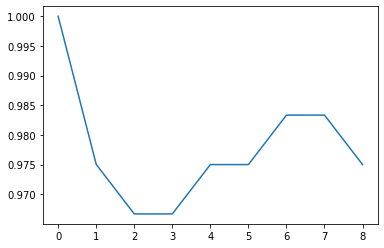

In [26]:
k=range(1,10)
test = Elbow(k)
plt.plot(test)

In [27]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_x,train_y)
train_pred = knn.predict(train_x)
test_pred = knn.predict(test_x)
train_f1 = f1_score(train_pred,train_y,average='weighted')
test_f1 = f1_score(test_pred,test_y,average='weighted')

train_acc = accuracy_score(train_pred,train_y)
test_acc = accuracy_score(test_pred,test_y)

print("Training F1 Score : ",train_f1)
print("Testing F1 Score : ",test_f1)
print("*****************************************")
print("Training Accuracy : ",train_acc)
print("Testing Accuracy : ",test_acc)

Training F1 Score :  1.0
Testing F1 Score :  0.9002506265664162
*****************************************
Training Accuracy :  1.0
Testing Accuracy :  0.9


## Building Models

In [28]:
models =[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))

In [29]:
# Evaluate 
result = []
names =[]
for name,model in models:
    kfold = StratifiedKFold(n_splits=10)
    cv_result = cross_val_score(model,train_x,train_y,cv=kfold,scoring='accuracy')
    result.append(cv_result)
    names.append(name)
    print('%s : %f (%f)'% (name,cv_result.mean(),cv_result.std()))

LR : 0.891667 (0.083749)
LDA : 0.991667 (0.025000)
KNN : 0.983333 (0.033333)
NB : 0.958333 (0.041667)
SVM : 0.975000 (0.038188)


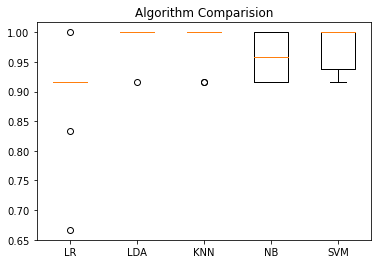

In [30]:
# Comparing Models
plt.boxplot(result,labels=names)
plt.title("Algorithm Comparision")
plt.show()

In [31]:
# make predictions on LDA
model = LinearDiscriminantAnalysis()
model.fit(train_x,train_y)
pred = model.predict(test_x)

In [32]:
# Evaluate our Predictions
print(accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(pred,test_y))

0.9333333333333333
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30

